## Aplicaciones Prácticas

1. Integrar Python y SQL para la extracción de datos.
2. Implementar scripts de Python en Power BI para análisis avanzado.
3. Crear y optimizar visualizaciones de Python en Power BI.

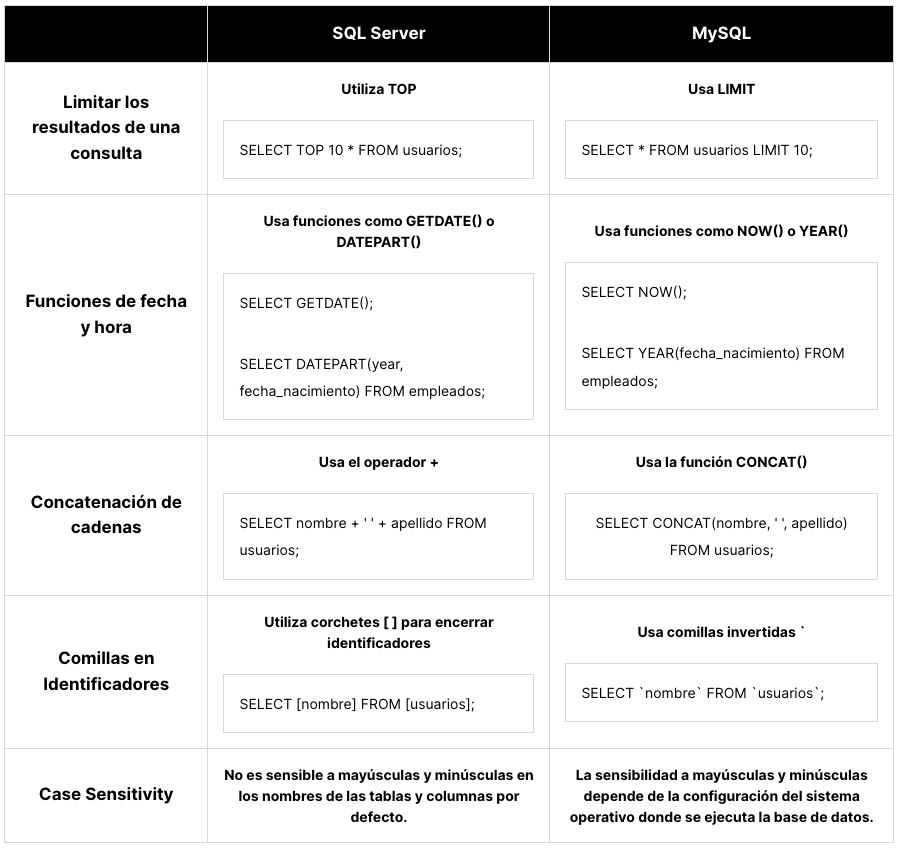

### Consejos para evitar confusiones

- Consulta la documentación específica del DBMS para cualquier función o sintaxis que no estés seguro de cómo utilizar.

- Prueba tus consultas en la interfaz de administración del DBMS (como SQL Server Management Studio para SQL Server o phpMyAdmin para MySQL) antes de integrarlas en tus scripts de Python.

- Utiliza manejo de excepciones en Python para capturar y entender los errores SQL específicos que puedan surgir debido a diferencias de sintaxis.

- Al estar consciente de estas diferencias y cómo abordarlas, puedes minimizar los errores y mejorar la eficiencia en el desarrollo de scripts que interactúan con múltiples sistemas de bases de datos.

#### Previo a esto
- Encendemos el servicio de postgresql. En Mac: brew services start postgresql@15 / Con stop luego apago el servicio cuando no la uso más.
- Creamos el dataset ubidify. En mi caso en postgresql vía terminal
- Creamos las 4 tablas
- Cargamos los inserts en las tablas

In [1]:
from sqlalchemy import create_engine # Biblioteca que yo uso para conectarme con base de datos locales
from dotenv import load_dotenv
import pandas as pd
import os

# Cargar las variables de entorno desde el archivo .env
load_dotenv()

# Obtener las variables de entorno
password = os.getenv("DB_PASSWORD")

# Configuración de la conexión
user = "mgobea"
password = password # Reemplazar con el password de tu motor local
host = "localhost"
port = "5432"
database = "ubidify"

# Crear la URI de conexión
connection_uri = f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}"

# Crear el motor de conexión
engine = create_engine(connection_uri)

# Leer la tabla clase_5 en un DataFrame de Pandas
df_conductores = pd.read_sql_query(
    sql="SELECT * FROM Conductores WHERE id_conductor < 19;", 
    con=engine
) # Excluyo los duplicados vía SQL

df_usuarios = pd.read_sql_table(
    table_name="usuarios",
    con=engine
)

df_vehiculos = pd.read_sql_table(
    table_name="vehiculos",
    con=engine
)

df_viajes = pd.read_sql_table(
    table_name="viajes",
    con=engine
)

# Mostrar uno de los DataFrames
df_conductores

,id_conductor,nombre,licencia,telefono,activo
0,1,Roberto Gomez,LIC001,555-0404,True
1,2,Ana Castillo,LIC002,555-0505,True
2,3,Lucas Martin,LIC003,555-0606,True
3,4,Diego Sanchez,LIC004,555-0707,True
4,5,Marta Jimenez,LIC005,555-0808,True
5,6,Tomas Lopez,LIC006,555-0909,True
6,7,Carla Ruiz,LIC007,555-1010,True
7,8,Nicolas Herrera,LIC008,555-1111,True
8,9,Paula Diaz,LIC009,555-1212,True
9,10,Rodrigo Ortiz,LIC010,555-1313,True


In [11]:
df_vehiculos

,id_vehiculo,id_conductor,marca,modelo,placa
0,1,1,Toyota,Corolla,ABC123
1,2,2,Honda,Civic,DEF456
2,3,3,Ford,Fiesta,GHI789
3,4,4,Chevrolet,Cruze,JKL012
4,5,5,Hyundai,Elantra,MNO345
5,6,6,Nissan,Sentra,PQR678
6,7,7,Volkswagen,Jetta,STU901
7,8,8,Kia,Forte,VWX234
8,9,9,Mazda,3,YZA567
9,10,10,Subaru,Impreza,BCD890


In [10]:
df_usuarios

,id_usuario,nombre,email,telefono,fecha_registro
0,1,Juan Perez,juan.perez@example.com,555-0101,2021-01-10
1,2,Maria Lopez,maria.lopez@example.com,555-0202,2021-01-11
2,3,Carlos Diaz,carlos.diaz@example.com,555-0303,2021-02-15
3,4,Laura Garcia,laura.garcia@example.com,555-0404,2021-03-20
4,5,Jorge Martinez,jorge.martinez@example.com,555-0505,2021-04-25
5,6,Sofia Fernandez,sofia.fernandez@example.com,555-0606,2021-05-30
6,7,Miguel Torres,miguel.torres@example.com,555-0707,2021-06-15
7,8,Lucia Ramirez,lucia.ramirez@example.com,555-0808,2021-07-10
8,9,Pablo Gonzalez,pablo.gonzalez@example.com,555-0909,2021-08-05
9,10,Victoria Alvarez,victoria.alvarez@example.com,555-1010,2021-09-12


In [16]:
df_viajes

,id_viaje,id_usuario,id_vehiculo,fecha_hora_inicio,fecha_hora_fin,costo
0,58,1,1,2022-03-01 08:00:00,2022-03-01 08:30:00,150.0
1,59,2,2,2022-03-01 09:00:00,2022-03-01 09:45:00,200.0
2,60,3,3,2022-03-02 10:00:00,2022-03-02 10:30:00,120.0
3,61,4,4,2022-03-03 11:00:00,2022-03-03 11:30:00,180.0
4,62,5,5,2022-03-04 12:00:00,2022-03-04 12:30:00,220.0
...,...,...,...,...,...,...
103,161,9,11,2023-03-26 12:00:00,2023-03-26 12:40:00,220.0
104,162,10,12,2023-03-27 13:00:00,2023-03-27 13:50:00,140.0
105,163,11,13,2023-03-28 14:00:00,2023-03-28 14:35:00,170.0
106,164,12,14,2023-03-29 15:00:00,2023-03-29 15:25:00,190.0


In [17]:
# Consulta SQL
query = """
SELECT U.Fecha_Registro, COUNT(V.ID_Viaje) as Num_Viajes
FROM Usuarios U
JOIN Viajes V ON U.ID_Usuario = V.ID_Usuario
GROUP BY U.Fecha_Registro
ORDER BY U.Fecha_Registro;
"""

# Cargar los resultados en un DataFrame
df = pd.read_sql_query(query, engine)
df

,fecha_registro,num_viajes
0,2021-01-10,6
1,2021-01-11,6
2,2021-02-15,6
3,2021-03-20,6
4,2021-04-25,6
5,2021-05-30,6
6,2021-06-15,6
7,2021-07-10,6
8,2021-08-05,6
9,2021-09-12,6


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha_registro  19 non-null     datetime64[ns]
 1   num_viajes      19 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 436.0 bytes


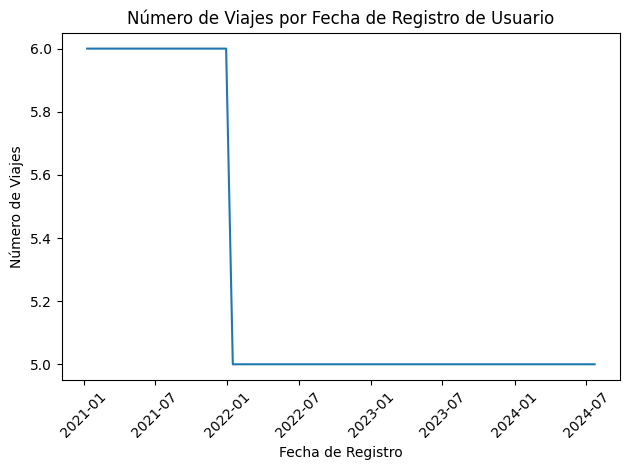

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crar el gráfico
sns.lineplot(
    data=df,
    x=df["fecha_registro"],
    y=df["num_viajes"]
)
plt.xlabel("Fecha de Registro")
plt.xticks(rotation=45)
plt.ylabel("Número de Viajes")
plt.title("Número de Viajes por Fecha de Registro de Usuario")
plt.tight_layout()

plt.show()

### Cuando usar Python en PowerBI

- Transformaciones complejas

    Aunque Power Query es potente, hay ciertas operaciones de limpieza de datos o transformaciones específicas que son fácilmente manejables o posibles con pandas. Por ejemplo, operaciones complejas de fecha y hora, manipulaciones de texto avanzadas, o cálculos personalizados que dependen de la lógica de programación que es más directamente expresable en Python.


- Automatización de procesos

    Pandas permite automatizar ciertas tareas de manipulación de datos que pueden ser repetitivas y tediosas en Power Query, especialmente cuando se integran datos de múltiples fuentes que requieren una preparación extensiva.

- Análisis y modelado de datos

    Pandas es fundamental para el análisis de datos en Python, proporcionando estructuras de datos y operaciones de manipulación de datos que facilitan el análisis y el modelado estadístico o de machine learning dentro de Power BI usando Python.
    Permite la integración de bibliotecas de Python como scikit-learn para modelos de machine learning o statsmodels para análisis estadísticos, donde los df de pandas son la estructura de datos estándar.

- Visualización de datos avanzada

    Al usar Python en Power BI para crear visualizaciones, pandas junto con bibliotecas como matplotlib, seaborn, o plotly, se pueden crear gráficos complejos y altamente personalizados que no son directamente posibles con las visualizaciones estándar de Power BI.

    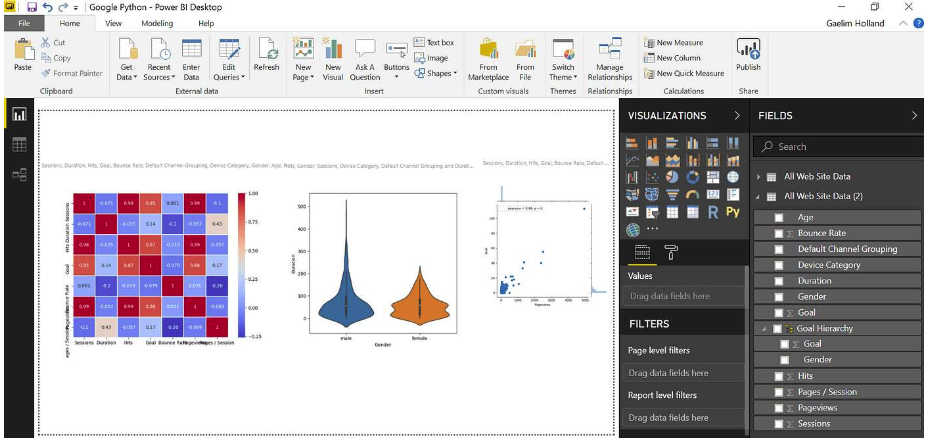

- Antes de comenzar, asegúrate de tener configurado tu entorno de Power BI según lo aprendido en la clase anterior. A continuación, crearemos un script en nuestro entorno de desarrollo local de Python, en donde nos aseguraremos de que se ejecute correctamente.

Cargar datos mediante un script

1. En la cinta Inicio, selecciona Obtener datos > Otro. También puedes escribir "python" en el buscador.
   
2. Selecciona Otros > script de Python.
   
3. Selecciona Conectar. Tu última versión local de Python instalada se selecciona como tu motor de Python. Copia el script en el cuadro de diálogo de script de Python que aparece.
   
4. Selecciona Aceptar. Si el script se ejecuta correctamente, aparece el Navegador y puedes cargar los datos y utilizarlos. Para el ejemplo, selecciona df, como se muestra en la imagen y, a continuación, Cargar.

    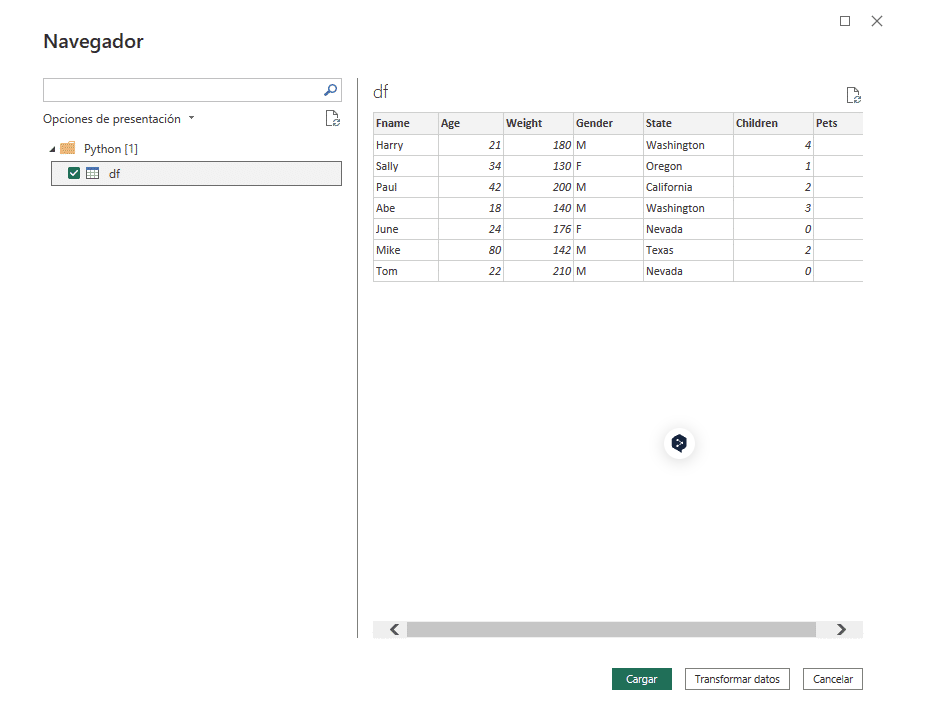

In [24]:
# Script para correr en Power BI:
import pandas as pd
dataset = pd.DataFrame({ 
    'Fname':['Harry','Sally','Paul','Abe','June','Mike','Tom'], 
    'Age':[21,34,42,18,24,80,22], 
    'Weight': [180, 130, 200, 140, 176, 142, 210], 
    'Gender':['M','F','M','M','F','M','M'], 
    'State':['Washington','Oregon','California','Washington','Nevada','Texas','Nevada'],
    'Children':[4,1,2,3,0,2,0],
    'Pets':[3,2,2,5,0,1,5] 
}) 

print(dataset) # El print al llevar el script a Power BI SI es necesario para que el dataframe se imprima. 

   Fname  Age  Weight Gender       State  Children  Pets
0  Harry   21     180      M  Washington         4     3
1  Sally   34     130      F      Oregon         1     2
2   Paul   42     200      M  California         2     2
3    Abe   18     140      M  Washington         3     5
4   June   24     176      F      Nevada         0     0
5   Mike   80     142      M       Texas         2     1
6    Tom   22     210      M      Nevada         0     5


Visualizaciones de python en Power BI

1. Selecciona el icono visual de Python en el panel Visualizaciones.

2. En el cuadro de diálogo Habilitar objetos visuales de script que aparece, selecciona Habilitar. Al agregar un objeto visual de Python a un informe, Power BI Desktop realiza las siguientes acciones:
    - Aparece una imagen visual de Python de marcador de posición en el lienzo del informe.
    - El editor de scripts de Python aparece en la parte inferior del panel central.

3. A continuación, arrastraremos los campos Edad, Niños, Fname, Género, Mascotas, Estado y Peso a la sección Valores donde dice Agregar campos de datos aquí. El script de Python solo puede usar campos agregados a la sección Valores. Podemos agregar o quitar campos de la sección Valores mientras trabajamos en el script. Power BI Desktop detecta automáticamente los cambios de campo.

4. Ahora podemos usar los datos para crear un objeto visual. A medida que seleccionamos o eliminamos campos, el código de soporte en el editor de scripts de Python se genera o elimina automáticamente. Se puede acceder a las columnas del conjunto de datos utilizando sus respectivos nombres. Por ejemplo, codificar en el script de Python para acceder al campo de edad.dataset["Age"].

5. Con el marco de datos generado automáticamente por los campos, se puede escribir un script de Python que resulte en el trazado predeterminado de Python. Cuando se complete el script, seleccionamos Ejecutar desde la barra de título del editor de scripts de Python.

    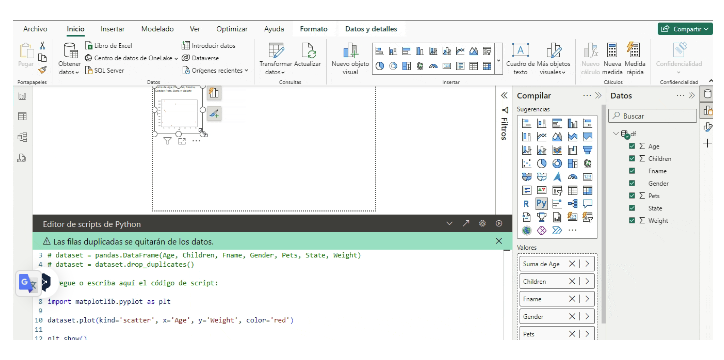

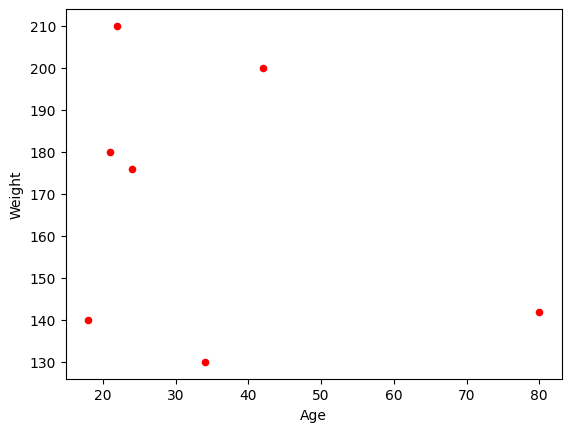

In [25]:
# Ejemplo de Gráfico de Dispersión para llevar a Power BI:
import matplotlib.pyplot as plt
dataset.plot(kind='scatter', x='Age', y='Weight', color='red')
plt.show()

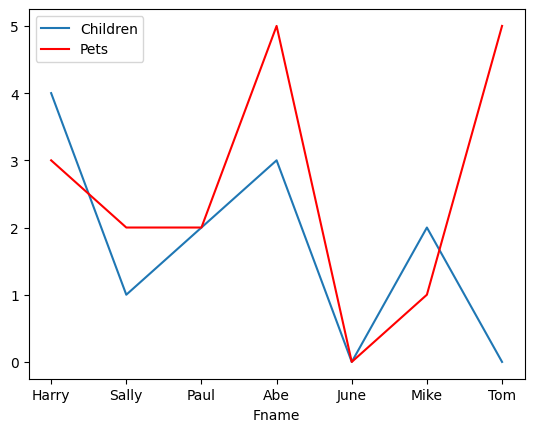

In [26]:
# Gráfico de Lineas
import matplotlib.pyplot as plt 

ax = plt.gca() 
dataset.plot(kind='line',x='Fname',y='Children',ax=ax) 
dataset.plot(kind='line',x='Fname',y='Pets', color='red', ax=ax) 
plt.show()

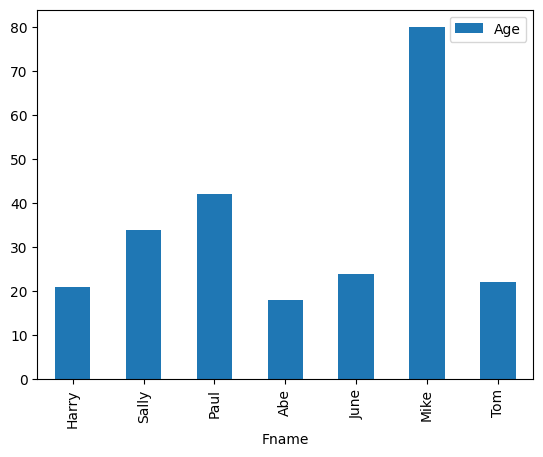

In [27]:
# Gráfico de Barras en Power BI
import matplotlib.pyplot as plt 

dataset.plot(kind='bar',x='Fname',y='Age')
plt.show()

### Limitaciones y Buenas Prácticas: 

- Google Sheets

    1. Rendimiento: No está diseñado para manejar grandes volúmenes de datos o análisis muy complejos.  Limitar el uso de Google Sheets a análisis de menor escala y datos que no requieran cálculos intensivos.
    2. Seguridad: Al ser un servicio basado en la nube, depende de la seguridad de la cuenta de Google y es susceptible a riesgos de compartición inadecuada de información.  Utilizar la autenticación de dos factores para las cuentas de Google y ser cauteloso al compartir hojas y carpetas.
    3. Mantenibilidad: Organizar las hojas claramente y mantener la documentación dentro de las propias hojas para explicar fórmulas y datos.

- Power BI:

    1. Rendimiento: Power BI puede volverse lento con datasets muy grandes o con muchas visualizaciones complejas en un solo reporte. Aprender a utilizar el Servicio de Power BI en la nube, puede mejorar la capacidad para segmentar los datos y reducir la carga. También es recomendable profundizar en técnicas de modelado de datos eficientes como modelos estrellas o copo de nieve.
    2. Seguridad: Controlar el acceso a los datos y reportes puede ser un desafío, especialmente en organizaciones grandes. Si bien existen estrategias para poder administrar gran cantidad de usuarios sin aumentar los costos de licenciamiento mediante reportes embebidos, esto puede generar ciertos riesgos de seguridad.
    3. Mantenibilidad: Crear dashboards y reportes con una estructura clara y documentar los procesos y fuentes de datos utilizados. Desarrollar reportes en Power BI requiere de iteraciones periódicas y refactoring tanto del modelo como del storytelling que poseen los dashboards. Recuerda que al entregar una primera versión de cualquier desarrollo, implica inevitablemente mejoras que deben ser abordadas en el futuro.

- Bases de Datos y SQL

    1. Rendimiento: Las bases de datos pueden experimentar lentitud con grandes volúmenes de datos o consultas complejas sin una adecuada optimización de índices y consultas. Utilizar índices, optimizar las consultas SQL y regularmente monitorear y ajustar el rendimiento de la base de datos, es fundamental para una utilización óptima. Si bien existe la posibilidad de conectar herramientas de visualización a entornos productivos, esto no es recomendable bajo ningún aspecto, debido a que puede afectar el funcionamiento de la BD transaccional que fue ideada para operar con alguna aplicación. En estos casos se recomienda pensar en réplicas, datalakes, etc.
    2. Seguridad: La exposición a inyecciones SQL y accesos no autorizados son riesgos significativos si no se gestionan correctamente los permisos y las entradas de datos.
    3. Mantenibilidad: Se debe mantener un esquema de consulta de base de datos bien documentado, esto permite realizar refactoring o seguimiento de los scripts de SQL que se desarrollan para la elaboración de datasets.

- Python

    1. Rendimiento: El rendimiento puede ser un problema con el procesamiento de grandes volúmenes de datos debido a que Python es un lenguaje interpretado. Pueden existir problemas relacionados a la capacidad de memoria RAM, bucles infinitos u otro tipo de errores que afecten el rendimiento.
    2. Seguridad: Scripts mal escritos que se conectan a bases de datos productivas, pueden ser vulnerables a inyecciones de código y ataques de datos. Se deben validar y sanear todas las entradas de datos cuando se ejecuten scripts que interactúan con fuentes externas. Utilizar entornos virtuales para aislar y gestionar dependencias.
    3. Mantenibilidad: Es importante escribir código limpio y bien documentado, y utilizar control de versiones para gestionar los cambios en el código.